In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.spatial import distance 

In [4]:
df = pd.read_parquet('/home/sjdailey/dailey-samuel/assignment-3/transactions_1.parquet')

In [6]:
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Display the data types of the columns
print("\nData types of the columns:")
print(df.dtypes)

# Count the number of missing values in each column
print("\nNumber of missing values in each column:")
print(df.isnull().sum())


First few rows of the dataframe:
   Unnamed: 0 trans_date_trans_time               cc_num  \
0      370679   2019-06-20 22:46:09  4301028321766222513   
1      370680   2019-06-20 22:47:28       30235438713303   
2      370681   2019-06-20 22:47:29  4292902571056973207   
3      370682   2019-06-20 22:48:37     4841313716651064   
4      370683   2019-06-20 22:49:26         630484879808   

                              merchant       category    amt    first  \
0  fraud_Schneider, Hayes and Nikolaus           None  55.61     None   
1                  fraud_Hammes-Beatty      KIDS_PETS  34.42    James   
2                   fraud_Waelchi-Wolf      KIDS_PETS  66.12  Jeffrey   
3                  fraud_Kihn-Schuster    food_dining  66.83     Omar   
4                      fraud_Beier LLC  entertainment  70.74      Ian   

      last sex                         street  ...      lat      long  \
0   Howard   M      109 Brian Lights Apt. 504  ...  40.6025  -80.3863   
1  Baldwin   M       

In [25]:
# Calculate age from 'dob'
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365
# Calculate Euclidean distance between customer and merchant locations
df['distance'] = df.apply(lambda row: distance.euclidean((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])), axis=1)

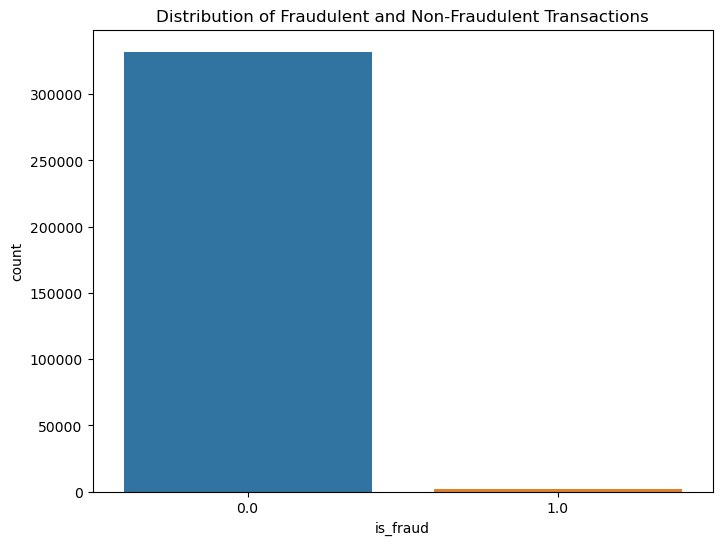

In [14]:
# Question 1: Distribution between fraudulent and non-fraudulent transactions
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

## We may need to weight fraudulent transactions depending on the type of anlysis

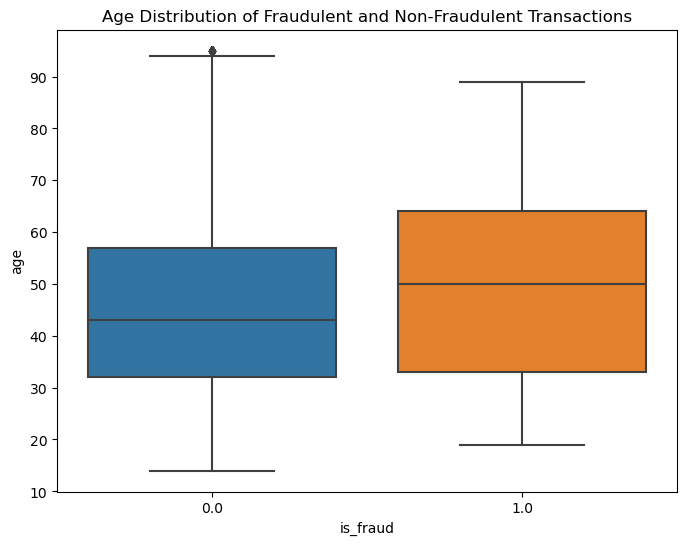

In [15]:
# Question 2: Age groups more susceptible to fraudulent transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='age', data=df)
plt.title('Age Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

## We probably can't use age as a strong predictor of fraudulent transactions

/home/sjdailey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sjdailey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


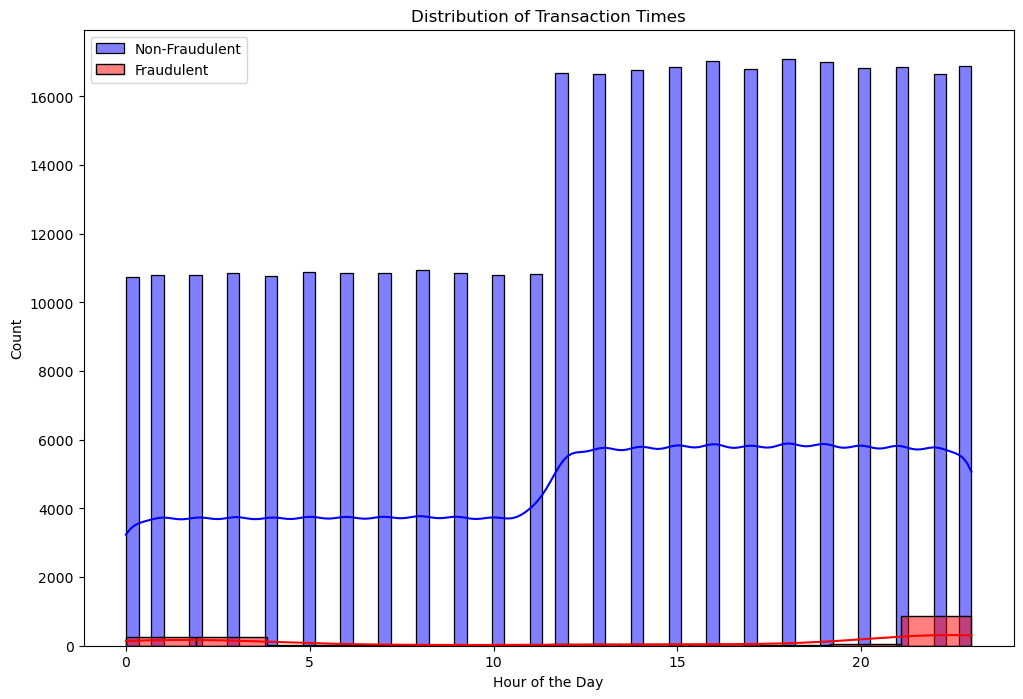

In [18]:


# Question 5: Distribution of transaction times between fraudulent and non-fraudulent transactions
plt.figure(figsize=(12, 8))
sns.histplot(df[df['is_fraud'] == 0]['trans_date_trans_time'].dt.hour, color='blue', label='Non-Fraudulent', kde=True)
sns.histplot(df[df['is_fraud'] == 1]['trans_date_trans_time'].dt.hour, color='red', label='Fraudulent', kde=True)
plt.title('Distribution of Transaction Times')
plt.xlabel('Hour of the Day')
plt.legend()
plt.show()

## We should probably look closer at late night/early morning transactions

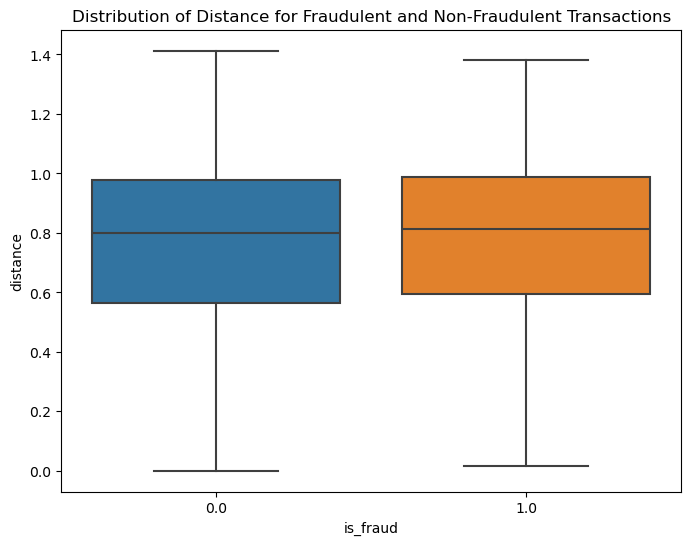

In [19]:
# Question 6: Relationship between distance and fraudulent transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='distance', data=df)
plt.title('Distribution of Distance for Fraudulent and Non-Fraudulent Transactions')
plt.show()

## Distance doesn't seem to be a strong predictor

## New York Sucks. Also, perhaps we should have different models for different locations as the behaviors seems to be somewhat localized.

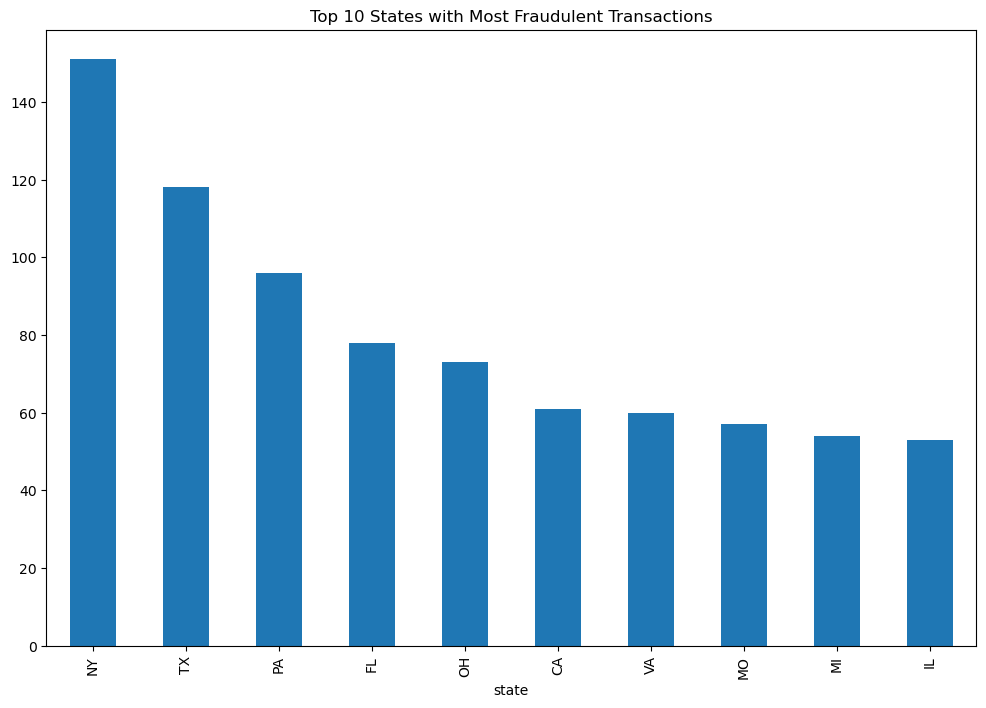

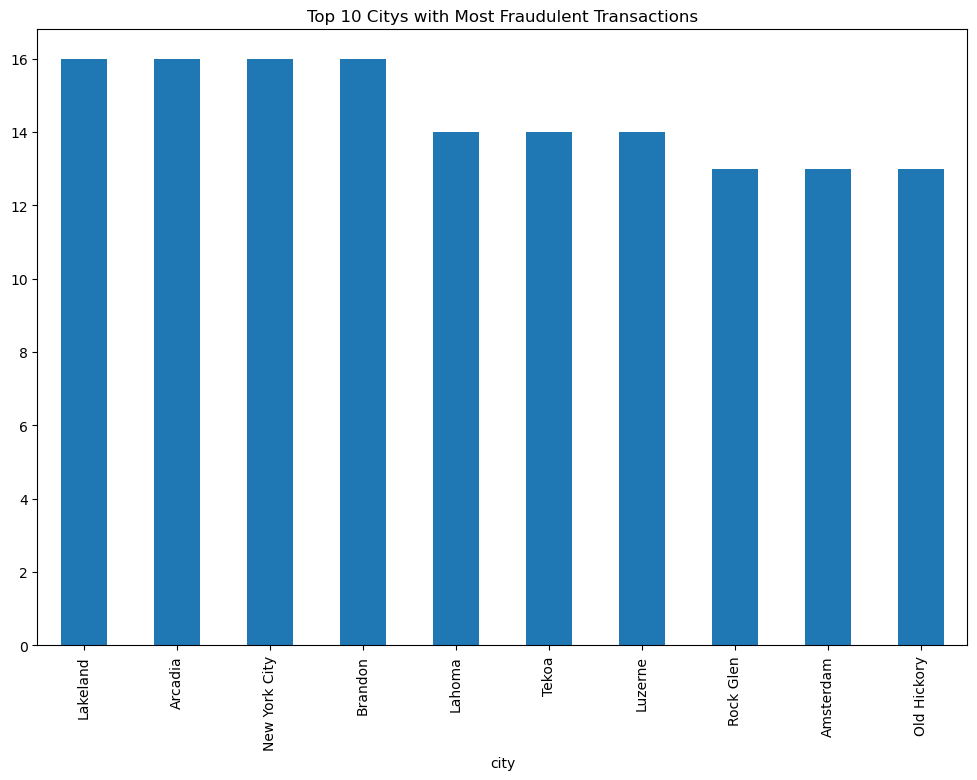

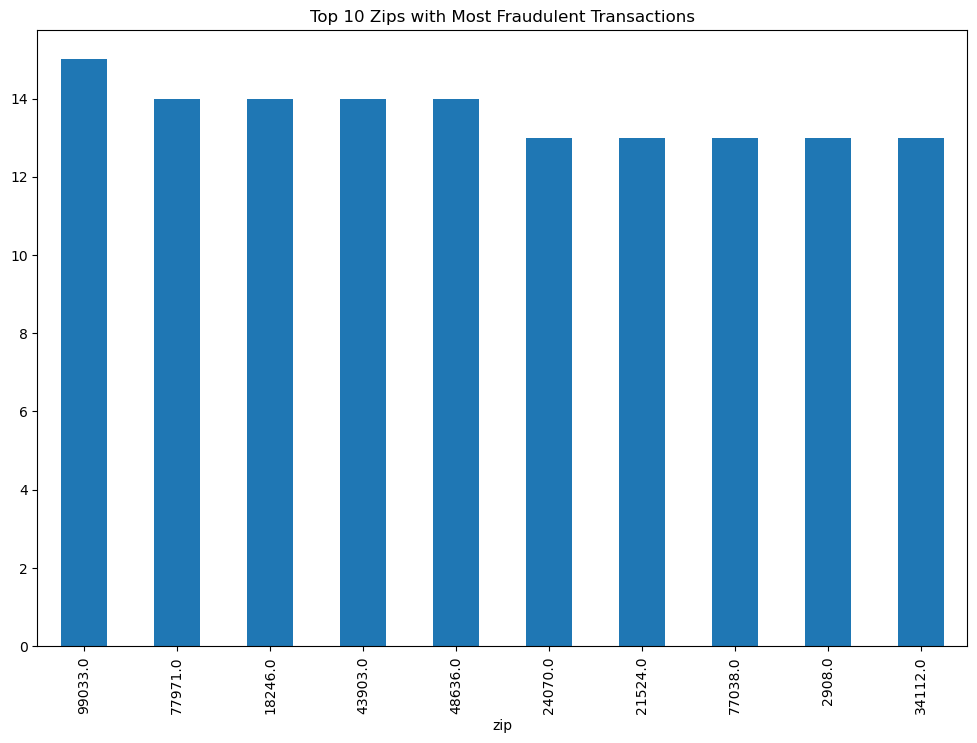

In [20]:
# Question 7: States, cities, and zip codes more susceptible to fraudulent transactions
for column in ['state', 'city', 'zip']:
    plt.figure(figsize=(12, 8))
    df[df['is_fraud'] == 1][column].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 {column.title()}s with Most Fraudulent Transactions')
    plt.show()

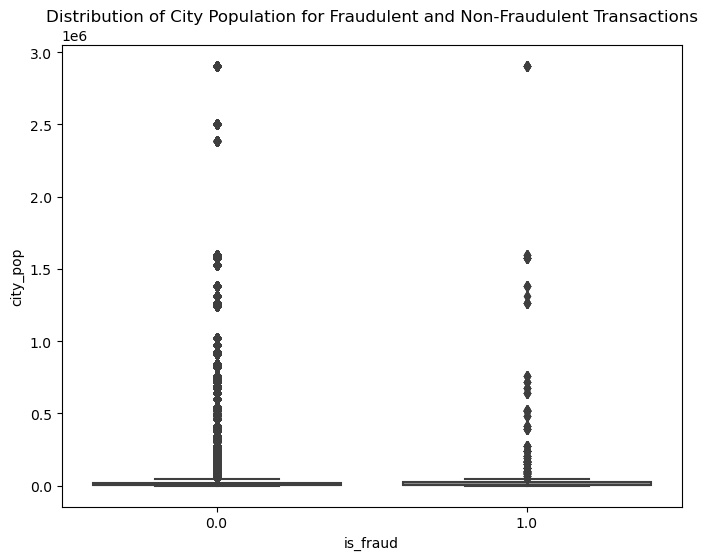

In [23]:
# Question 10: Relationship between 'city_pop' and incidence of fraud
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='city_pop', data=df)
plt.title('Distribution of City Population for Fraudulent and Non-Fraudulent Transactions')
plt.show()

## Probably not a super useful metric

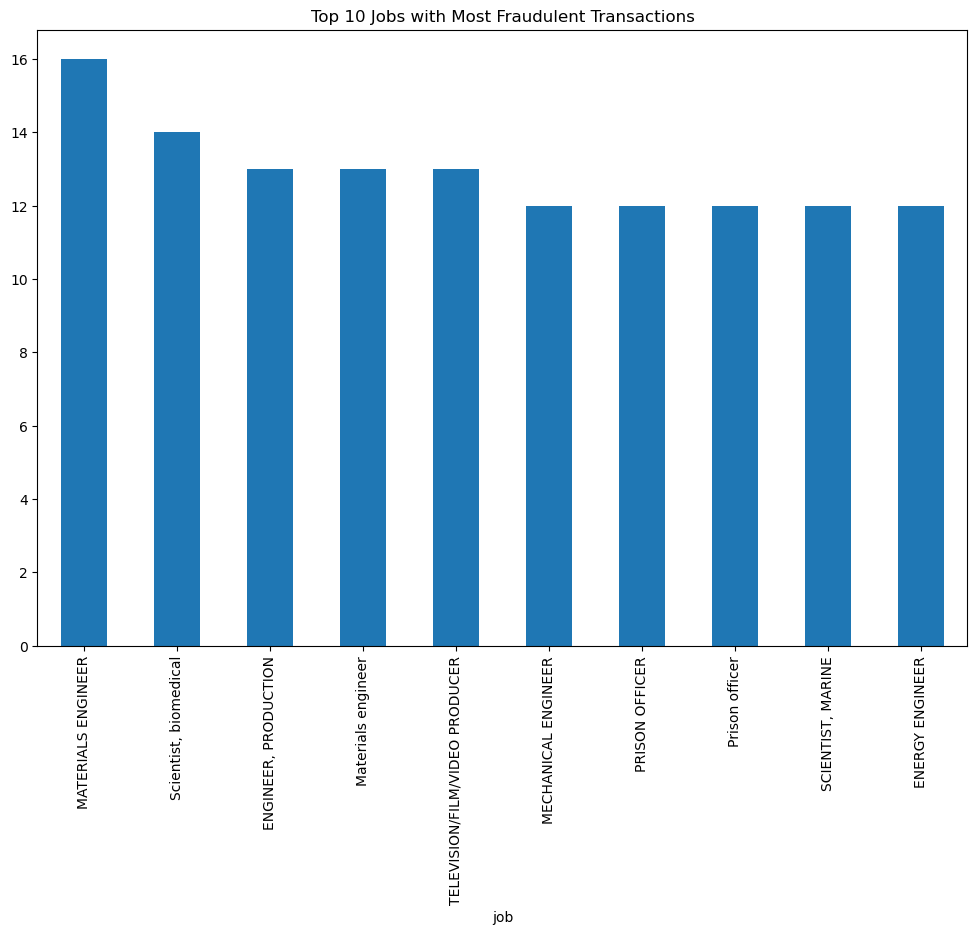

In [24]:
# Question 11: Jobs susceptible to fraudulent transactions
plt.figure(figsize=(12, 8))
df[df['is_fraud'] == 1]['job'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Jobs with Most Fraudulent Transactions')
plt.show()


## This seems to be a very helpful tool!